In [72]:
#the first half of this model is same as before, just that I have used the concept of pipeline in it.
#CRoss validation has been used instead of train and test splits
#Furthermore, standardisation here has been done after splitting the data

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
path=('airlines.csv')
data = pd.read_csv(path)
data.head(10)

,AirportCode,AirportName,TimeLabel,TimeMonth,TimeMonthName,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,...,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedTotal,StatisticsMinutesDelayedWeather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
5,DEN,"Denver, CO: Denver International",2003/06,6,June,2003,516,323,664,11,...,1611,22,10024,11691,26634,18969,23538,706,75428,5581
6,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2003/06,6,June,2003,986,1390,2147,19,...,4798,133,22303,27628,70918,80714,90574,683,263521,20632
7,DTW,"Detroit, MI: Detroit Metro Wayne County",2003/06,6,June,2003,376,371,570,6,...,1395,9,10227,11754,21802,18715,16482,139,60667,3529
8,EWR,"Newark, NJ: Newark Liberty International",2003/06,6,June,2003,322,519,1948,10,...,2921,42,9441,12506,20190,30905,91048,490,150513,7880
9,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2003/06,6,June,2003,247,256,427,5,...,967,10,3672,4662,12547,14600,14935,141,44303,2080


In [4]:
df = pd.DataFrame(data)
rndm=df.sample(frac=1) #randomising our data
rndm1=rndm.drop(['TimeLabel', 'AirportName', 'TimeMonthName' , 'StatisticsCarriersNames', 'StatisticsMinutesDelayedTotal'], axis = 1)

In [5]:
rndm1.head()

,AirportCode,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather
3198,EWR,8,2012,666,1079,1254,10,61,9,360,3070,37,7406,10873,49677,81802,79855,379,4846
2985,SLC,12,2011,307,389,243,2,17,12,51,957,10,8228,9246,15312,21508,6569,45,1549
2160,LAX,8,2009,889,1044,659,6,76,15,113,2674,21,14465,17273,52194,61593,24180,209,4695
1257,IAD,1,2007,530,778,458,2,51,15,175,1822,5,6570,8572,28313,51350,16439,47,2902
310,ORD,4,2004,728,1483,5346,2,129,14,456,7690,17,23928,32091,46434,84864,274465,139,9365


In [6]:
print(data.shape[0])
print(data.columns.tolist())
print(data.dtypes)


4408
['AirportCode', 'AirportName', 'TimeLabel', 'TimeMonth', 'TimeMonthName', 'TimeYear', 'Statistics_ofDelays_Carrier', 'Statistics_of Delays_Late Aircraft', 'Statistics_ofDelaysNationalAviationSystem', 'Statistics_ofDelays_Security', 'Statistics_of Delays_Weather', 'StatisticsCarriersNames', 'StatisticsCarriersTotal', 'StatisticsFlightsCancelled', 'StatisticsFlightsDelayed', 'StatisticsFlightsDiverted', 'StatisticsFlightsOnTime', 'StatisticsFlightsTotal', 'StatisticsMinutesDelayedCarrier', 'StatisticsMinutesDelayedLateAircraft', 'StatisticsMinutesDelayedNationalAviationSystem', 'StatisticsMinutesDelayedSecurity', 'StatisticsMinutesDelayedTotal', 'StatisticsMinutesDelayedWeather']
AirportCode                                       object
AirportName                                       object
TimeLabel                                         object
TimeMonth                                          int64
TimeMonthName                                     object
TimeYear               

In [7]:
#trying to convert object data to numbers

In [8]:
#data.Airport.Code.value_counts()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

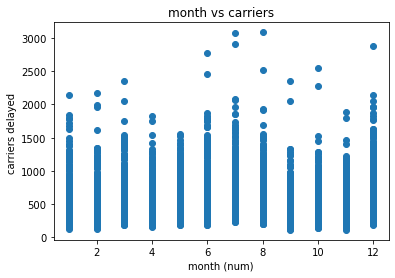

In [10]:
ax = plt.axes()

ax.scatter(data.TimeMonth, data.Statistics_ofDelays_Carrier)

# Label the axes
ax.set(xlabel='month (num)',
       ylabel='carriers delayed ',
       title='month vs carriers');

In [11]:
#OUTLIERS DETECTED, SHALL REMOVE AFTER A FEW MORE TRIALS


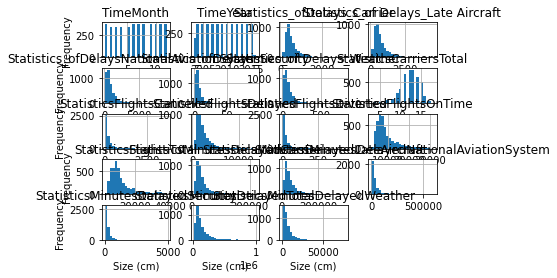

In [12]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Delays')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

In [13]:
#we have right skewed data


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   AirportCode                                     4408 non-null   object
 1   AirportName                                     4408 non-null   object
 2   TimeLabel                                       4408 non-null   object
 3   TimeMonth                                       4408 non-null   int64 
 4   TimeMonthName                                   4408 non-null   object
 5   TimeYear                                        4408 non-null   int64 
 6   Statistics_ofDelays_Carrier                     4408 non-null   int64 
 7   Statistics_of Delays_Late Aircraft              4408 non-null   int64 
 8   Statistics_ofDelaysNationalAviationSystem       4408 non-null   int64 
 9   Statistics_ofDelays_Security                    4408

In [15]:
data['code'] = pd.factorize(data.AirportCode)[0]

In [16]:
#data.head()
#OBJECTS REMOVED ALREADY DUE TO A MISTAKE, BUT WILL NOT AFFECT THE OUTCOME

In [17]:
data1=data.drop(['AirportCode', 'TimeLabel', 'AirportName', 'TimeMonthName' , 'StatisticsCarriersNames', 'StatisticsMinutesDelayedTotal' ], axis = 1)

In [18]:
data1.head(30)

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather,code
0,6,2003,1009,1275,3217,17,328,11,216,5843,27,23974,30060,61606,68335,118831,518,19474,0
1,6,2003,374,495,685,3,66,14,138,1623,3,7875,9639,20319,28189,24400,99,4160,1
2,6,2003,296,477,389,8,78,11,29,1245,15,6998,8287,13635,26810,17556,278,6201,2
3,6,2003,300,472,735,2,54,11,73,1562,14,7021,8670,14763,23379,23804,127,3792,3
4,6,2003,283,268,487,4,58,13,74,1100,18,5321,6513,13775,13712,20999,120,4141,4
5,6,2003,516,323,664,11,98,13,34,1611,22,10024,11691,26634,18969,23538,706,5581,5
6,6,2003,986,1390,2147,19,258,13,394,4798,133,22303,27628,70918,80714,90574,683,20632,6
7,6,2003,376,371,570,6,71,11,123,1395,9,10227,11754,21802,18715,16482,139,3529,7
8,6,2003,322,519,1948,10,121,13,102,2921,42,9441,12506,20190,30905,91048,490,7880,8
9,6,2003,247,256,427,5,34,11,13,967,10,3672,4662,12547,14600,14935,141,2080,9


In [19]:
#we're dropping minute total delayed because we dont want overfitting, as it is a logical arithematic calculation
#we could also try dummy variables for categorical variables

In [20]:
# Get a Pd.Series consisting of all the string categoricals
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#one_hot_encode_cols = data.dtypes[df.dtypes == np.object]  # filtering by string categoricals
#one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

#df[one_hot_encode_cols].head().T

In [21]:
#now we will check for skewing


In [22]:
data2 = data1
data1.isnull() #checking for null data

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather,code
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data2 = data2.fillna(0)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   TimeMonth                                       4408 non-null   int64
 1   TimeYear                                        4408 non-null   int64
 2   Statistics_ofDelays_Carrier                     4408 non-null   int64
 3   Statistics_of Delays_Late Aircraft              4408 non-null   int64
 4   Statistics_ofDelaysNationalAviationSystem       4408 non-null   int64
 5   Statistics_ofDelays_Security                    4408 non-null   int64
 6   Statistics_of Delays_Weather                    4408 non-null   int64
 7   StatisticsCarriersTotal                         4408 non-null   int64
 8   StatisticsFlightsCancelled                      4408 non-null   int64
 9   StatisticsFlightsDelayed                        4408 non-null  

In [25]:
from sklearn.preprocessing import StandardScaler

# will try scaling again after train test splitz

In [26]:
#scaler = StandardScaler()
#data3 =scaler.fit(data2)
#data4 =scaler.transform(data2)


In [27]:
#print (data4)

In [28]:
#data4 = pd.DataFrame(data4, columns = data2.columns)

In [29]:
#data4.head()

In [30]:
#we have scaled our data
#data4.info()

In [31]:
#we retained our column names

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
#y_col = 'StatisticsMinutesDelayedWeather'
#feature_cols = [x for x in data4.columns if x != y_col]
##x_data = data4[feature_cols]
#y_data = data4[y_col]
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=50)


In [34]:
#x_train

In [35]:
#def plot_data(data4, feature_cols) :
    #plt.figure(figsize=(10,6))
    #plt.subplot(1,2,1)
    #data4[feature_cols].hist()
    #plt.subplot(1,2,2)
    #stat.probplot(data4[feature_cols], dist='norm', plot = pylab)
    #plt.show()

In [36]:
#plot_data(data4, 'StatisticsMinutesDelayedWeather')

In [37]:
#plt.hist(data4['StatisticsMinutesDelayedWeather'],bins=20)

In [38]:
#cor = x_train.corr()

In [39]:
#print(cor)

In [40]:
#can creatw a heatmap using sns

In [41]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [73]:
##corr_features = correlation(x_train, 0.9)
#len(set(corr_features))

NameError: name 'x_train' is not defined

In [43]:
#corr_features

In [44]:
#these features can be removed and their adjacent features can be kept

In [45]:
#can drop the same features using xtest.drop


In [46]:
#ax = plt.axes()

#ax.scatter(data4.TimeMonth, data4.StatisticsMinutesDelayedWeather)

# Label the axes
#ax.set(xlabel='month (num)',
      # ylabel='carriers delayed ',
       #title='month vs carriers');

In [74]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [75]:
X = data2.drop('StatisticsMinutesDelayedWeather', axis=1)
y = data2.StatisticsMinutesDelayedWeather

In [49]:
#trying k-fold cross validation


In [76]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [51]:
#for train_index, test_index in kf.split(X):
    #print("Train index:", train_index[:10], len(train_index))
   # print("Test index:",test_index[:10], len(test_index))
    #print('')

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                       y[test_index])

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)

    scores.append(score)
 
    print(scores)

[0.9478221011738891]
[0.9478221011738891, 0.9515708973574447]
[0.9478221011738891, 0.9515708973574447, 0.9446540506696984]


In [53]:
#came close to vanilla regression. we did not get any value over 9.5

In [79]:
scored = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])

    X_train_s = s.fit_transform(X_train)

    lr.fit(X_train_s, y_train)

    X_test_s = s.transform(X_test)

    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)

    scored.append(score)

In [80]:
print(scored)

[0.94782210117389, 0.9515708973574443, 0.944654050669696]


In [56]:
##best reached is .9515 scaling does not matter on vanilla regression
#we will try ridge and lasso now for cross validatiohnj


In [81]:
s = StandardScaler()
lr = LinearRegression()

In [82]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [83]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [85]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [86]:
r2_score(y, predictions)

0.9479146913519446

In [87]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [88]:
scoreq = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)

    stimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)

    score = r2_score(y, predictions)

    scoreq.append(score)

In [89]:
print(coefs)

[]


In [90]:
print(scoreq)

[0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446, 0.9479146913519446]


In [66]:
#did not go above 9.47

In [91]:
list(zip(alphas,scores))

[(1e-09, 0.9478221011738891),
 (1e-08, 0.9515708973574447),
 (1e-07, 0.9446540506696984)]

In [92]:
Lasso(alpha=1e-6).fit(X, y).coef_

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4583416479.887233, tolerance: 18490420.452468973
  positive)


array([ 6.55088193e+00,  1.01616854e+00, -8.62210245e-02,  2.14776663e+00,
        1.59669404e+00,  4.35438999e+01,  8.06434883e+01,  2.32330698e+01,
        1.20307977e+00, -3.28264111e+00,  1.15546017e+01, -6.45992040e-02,
        2.40852272e-02,  5.97835195e-02,  2.68695464e-02,  1.55906241e-02,
       -7.13649434e-01,  2.98925197e-01])

In [93]:
Lasso(alpha=1.0).fit(X, y).coef_

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4432254886.811053, tolerance: 18490420.452468973
  positive)


array([ 6.44531337e+00,  7.60229844e-01, -8.68191490e-02,  2.14668182e+00,
        1.59361833e+00,  4.33739939e+01,  8.06359415e+01,  2.28245955e+01,
        1.20286382e+00, -3.28000693e+00,  1.15543405e+01, -6.45729118e-02,
        2.40410676e-02,  5.97819274e-02,  2.68530649e-02,  1.55975217e-02,
       -7.10904594e-01,  2.78844176e-01])

In [ ]:
#pf = PolynomialFeatures(degree=2)

#scoren = []
#alphas = np.geomspace(0.06, 6.0, 20)
#for alpha in alphas:
    #las = Lasso(alpha=alpha, max_iter=10000)

    #estimator = Pipeline([
       # ("scaler", s),
       # ("make_higher_degree", pf),
        #("lasso_regression", las)])

    #predictions = cross_val_predict(estimator, X, y, cv = kf)

    #score = r2_score(y, predictions)

    #scoren.append(score)
    
#print(scoren)    

In [71]:
#we still dont get a score over 0.945